In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor,plot_tree, plot_importance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df=pd.read_csv('/kaggle/input/sleep-health-and-lifestyle/ss.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


In [5]:
df['Blood Pressure'] = df['Blood Pressure'].str.replace('/', '-').str.split('-')
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: (int(x[0]) + int(x[1])) / 2)
df['Blood Pressure'] = df['Blood Pressure'].astype(int)


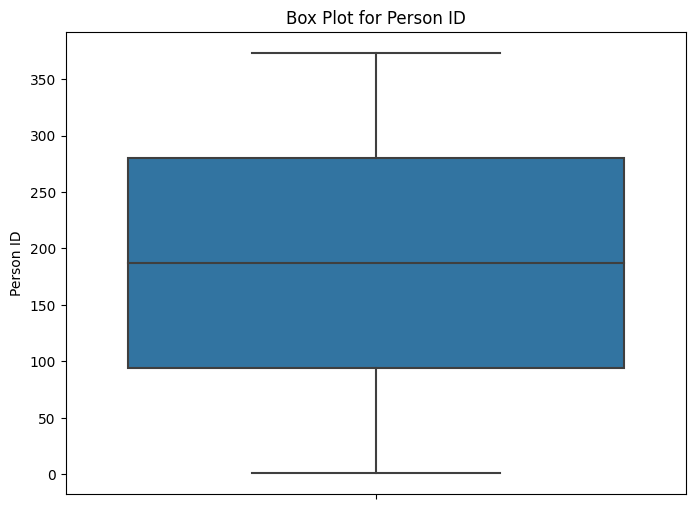

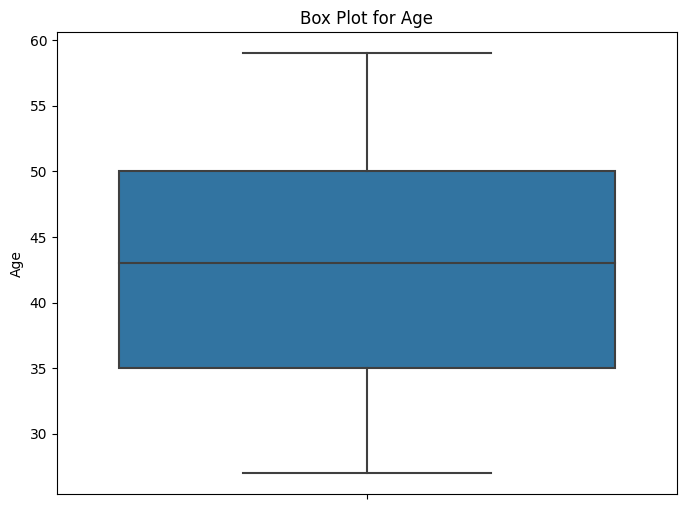

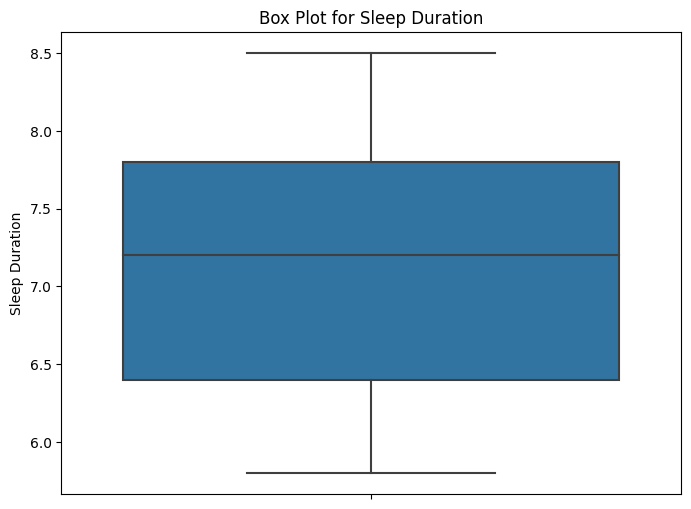

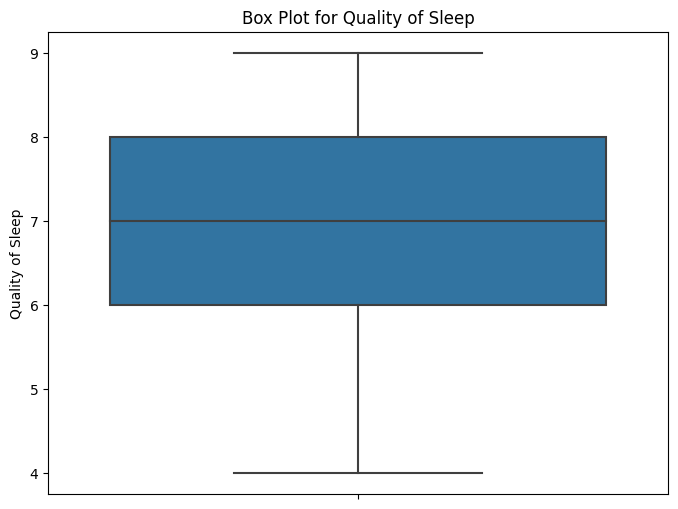

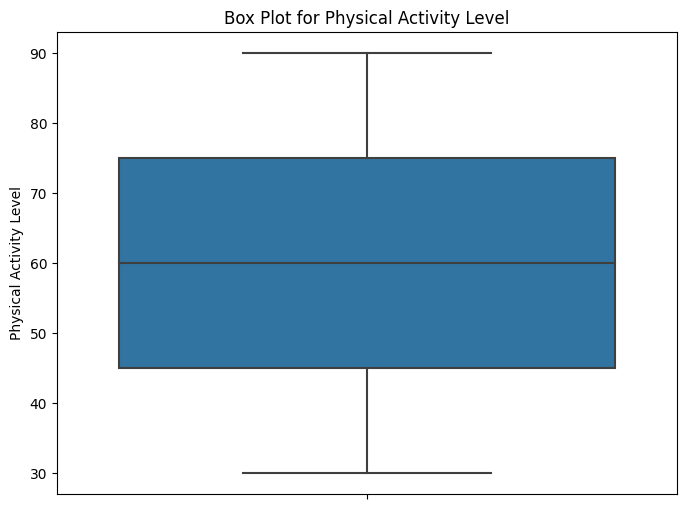

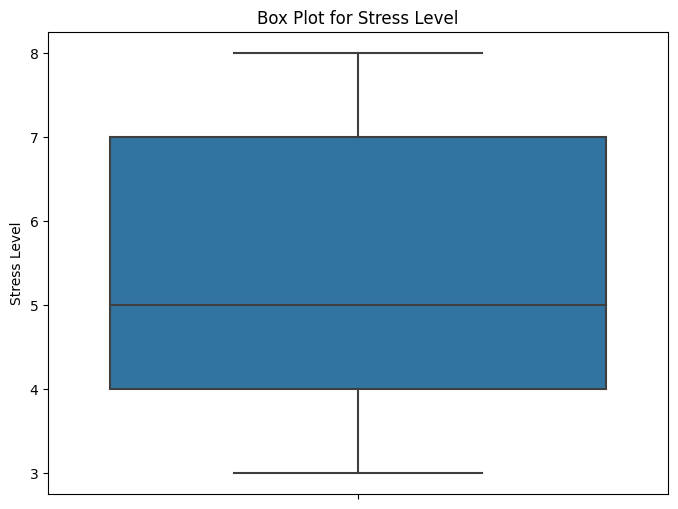

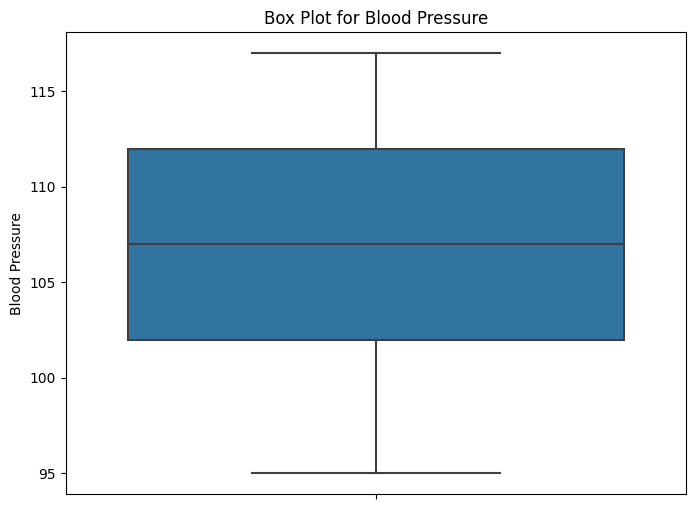

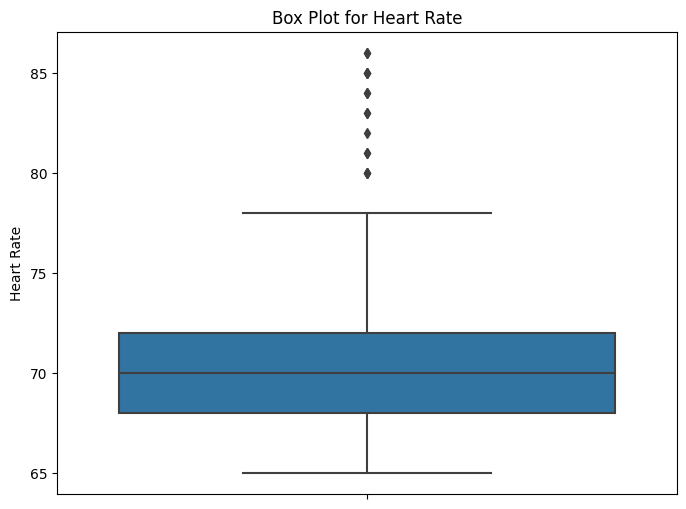

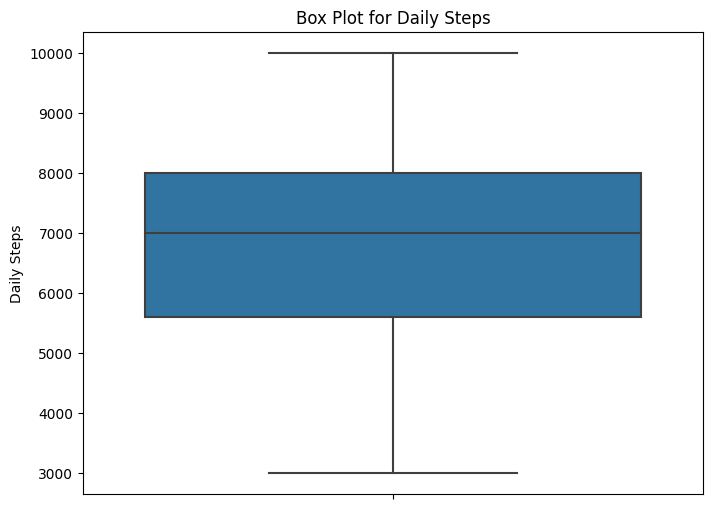

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


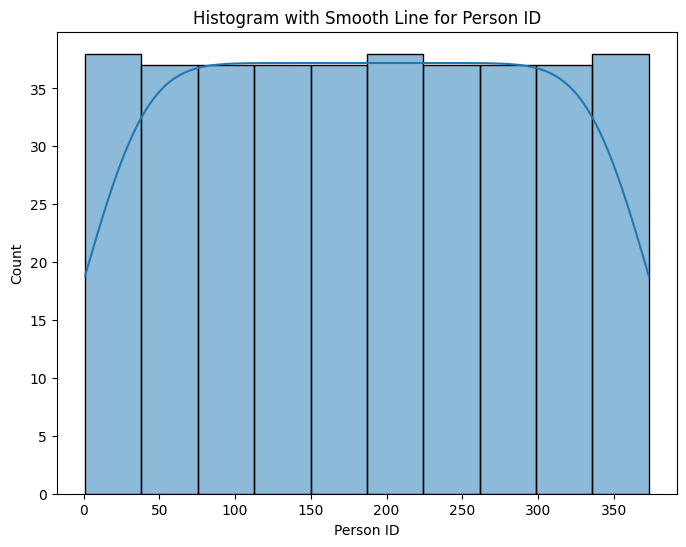

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


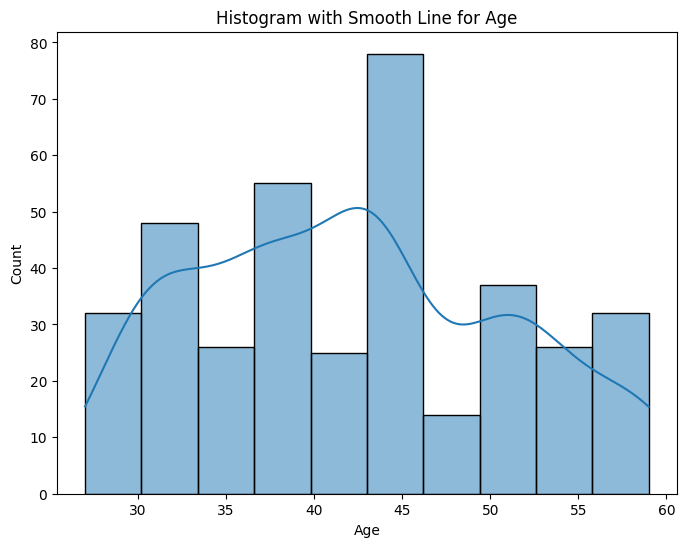

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


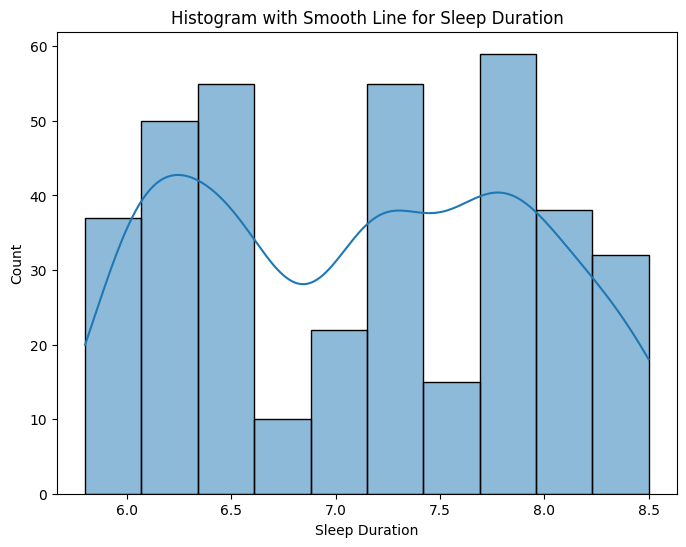

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


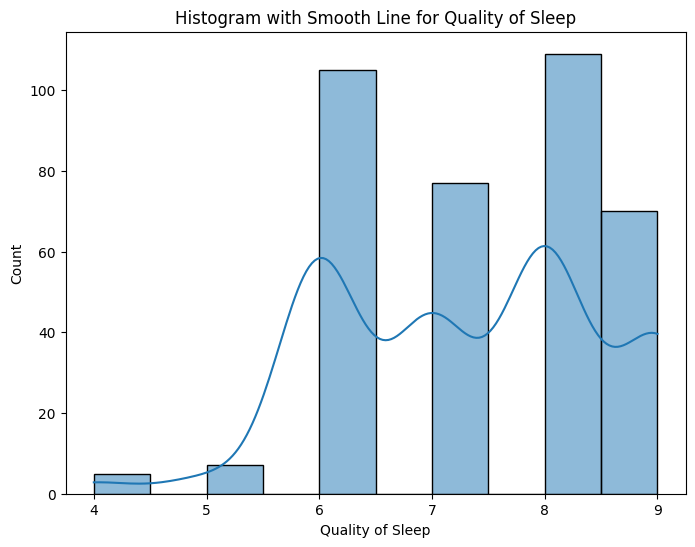

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


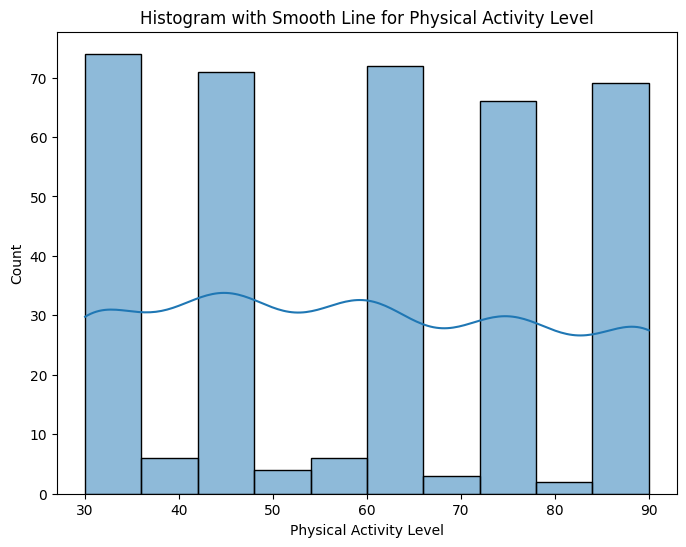

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


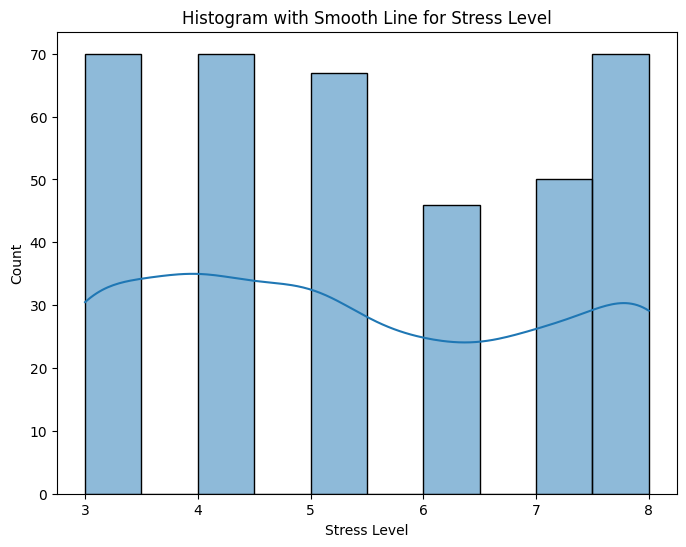

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


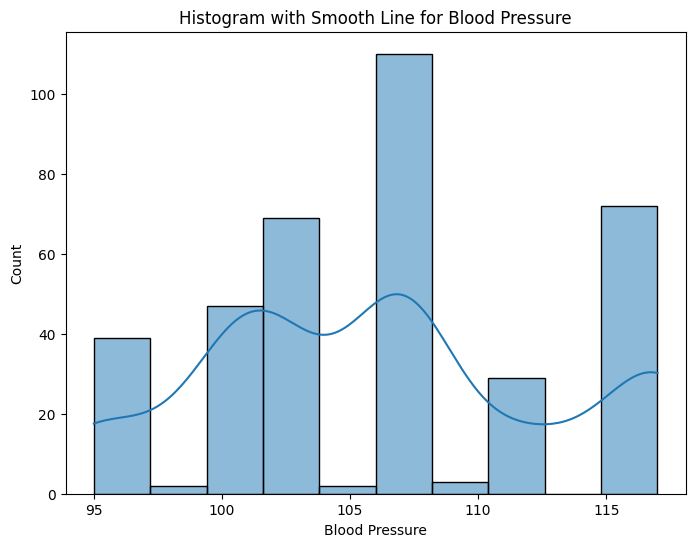

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


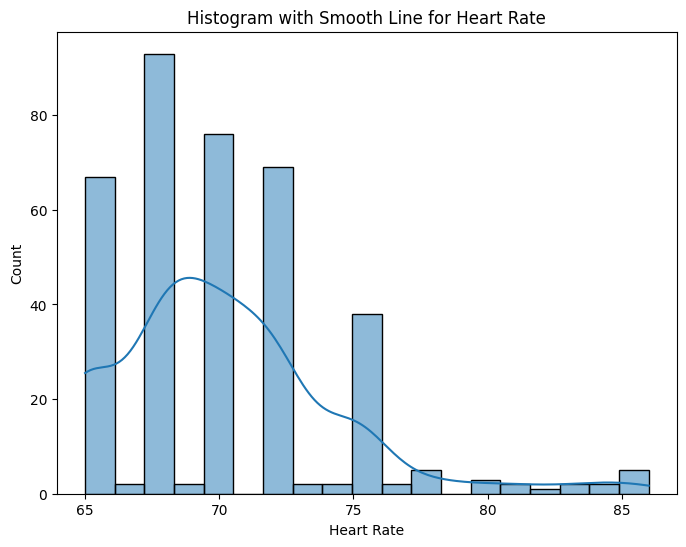

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


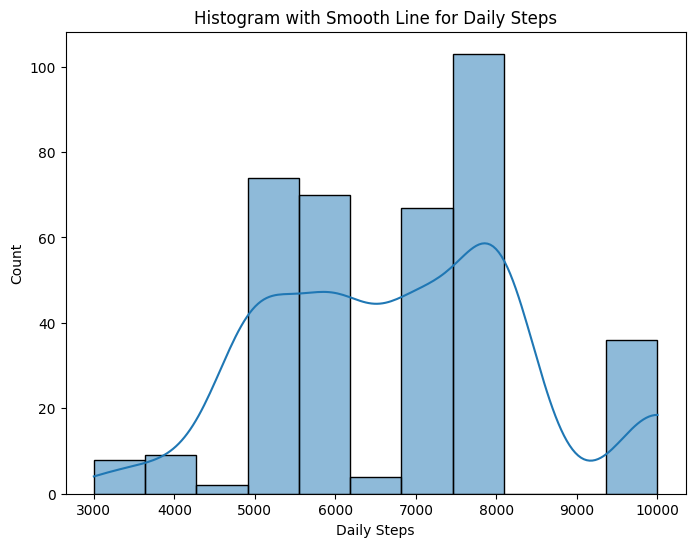

In [6]:
# Numerical Variables and plot
numerical_vars = df.select_dtypes(include=['int64', 'float64'])
for num_var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=num_var)
    plt.title(f'Box Plot for {num_var}')
    plt.show()

# Plot histogram with smooth line (kernel density estimate) for numerical variables
for num_var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=num_var, kde=True)
    plt.title(f'Histogram with Smooth Line for {num_var}')
    plt.show()

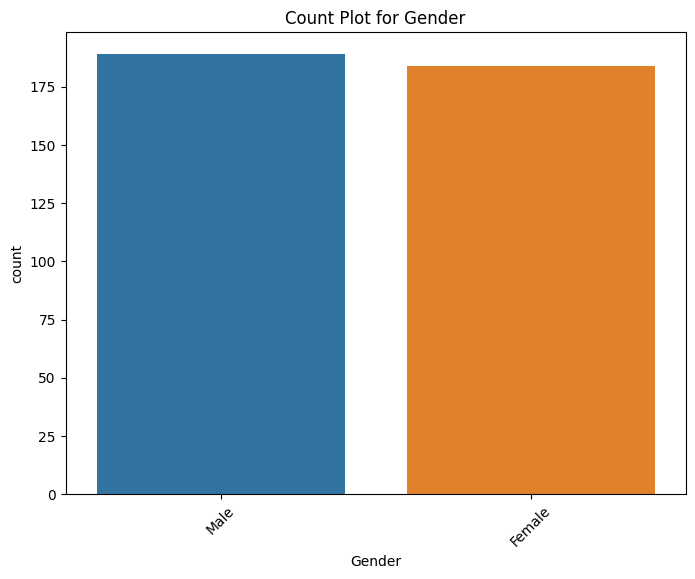

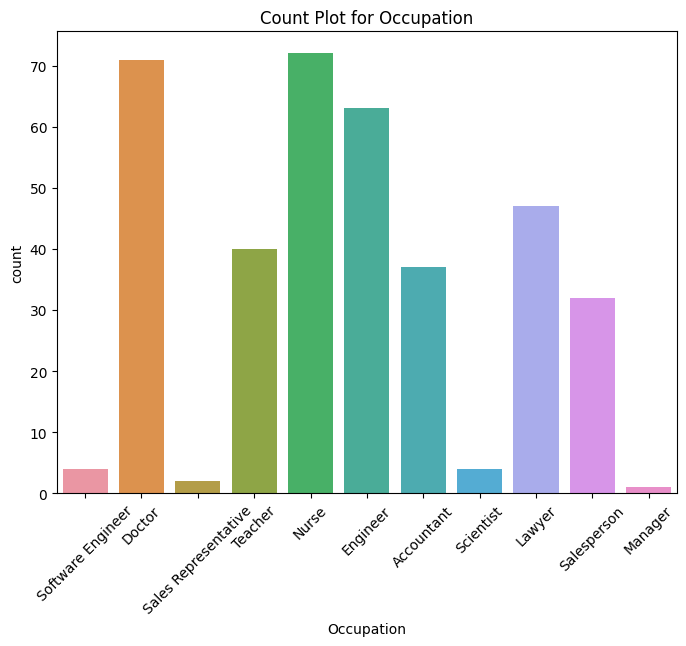

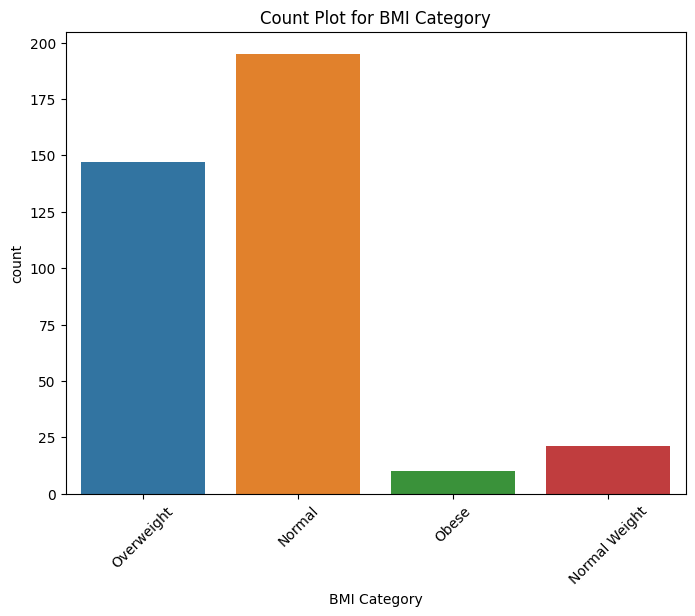

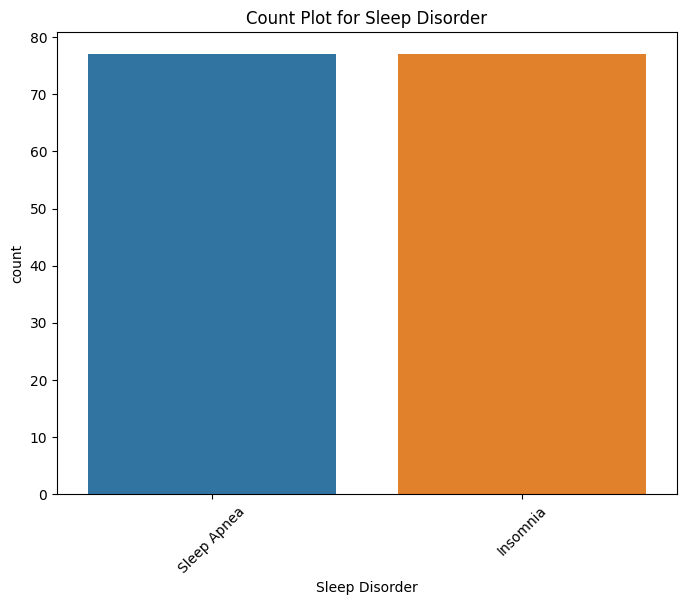

In [7]:
# Categorical Variables and plot
categorical_vars = df.select_dtypes(include=['object'])
for cat_var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=cat_var)
    plt.title(f'Count Plot for {cat_var}')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.show()


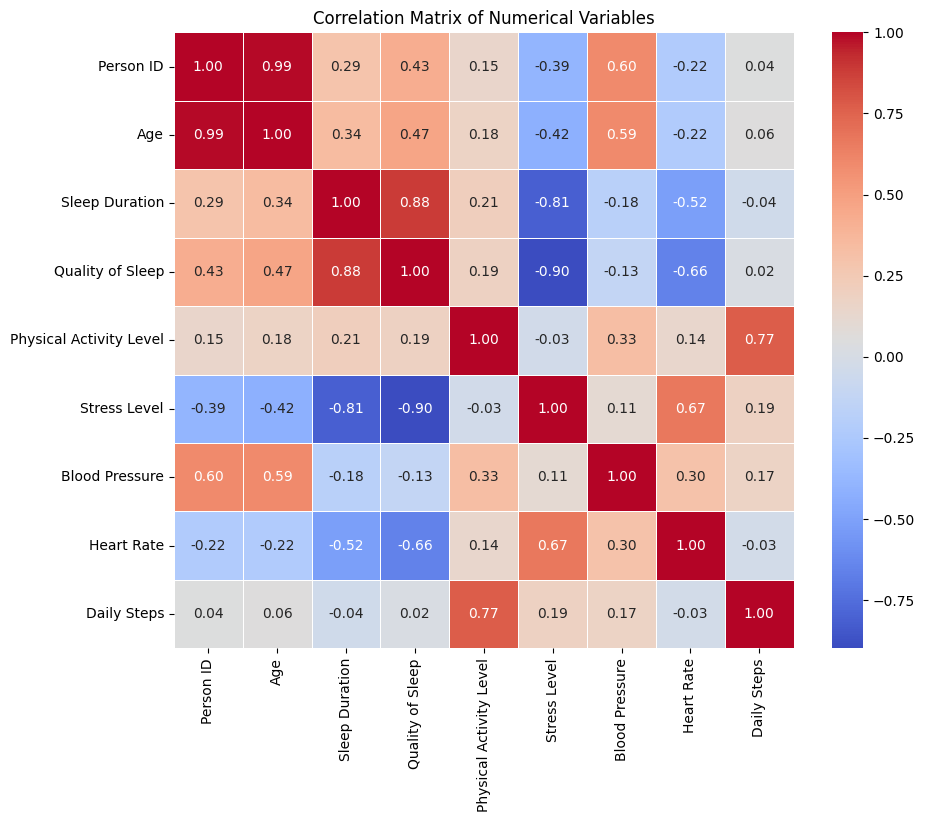

In [8]:
# Correlation matrix
correlation_matrix = numerical_vars.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Let's furtherly analyze the most interesting correlation

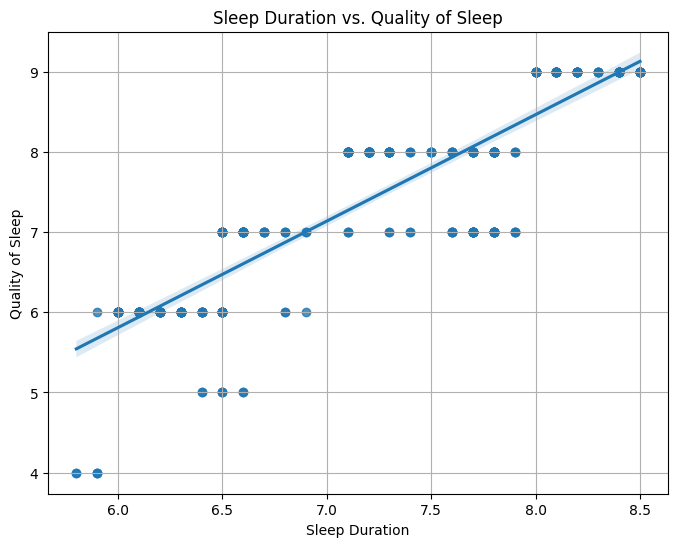

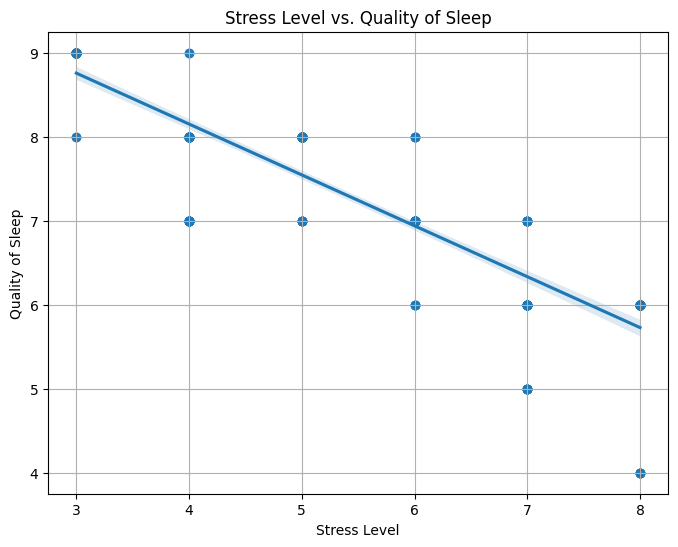

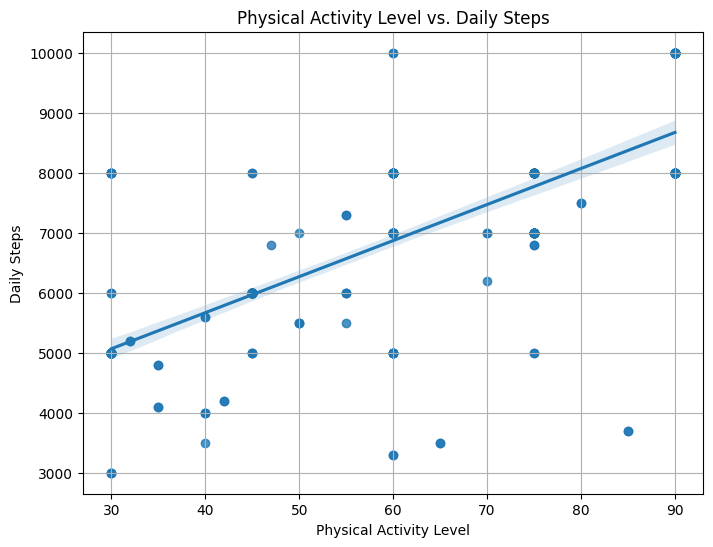

In [9]:
interesting_correlations = [
    ('Sleep Duration', 'Quality of Sleep'),
    ('Stress Level', 'Quality of Sleep'),
    ('Physical Activity Level', 'Daily Steps')
]

# Plotting the selected correlations with linear regression lines
for idx, (var1, var2) in enumerate(interesting_correlations, start=1):
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=var1, y=var2)
    plt.title(f'{var1} vs. {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()


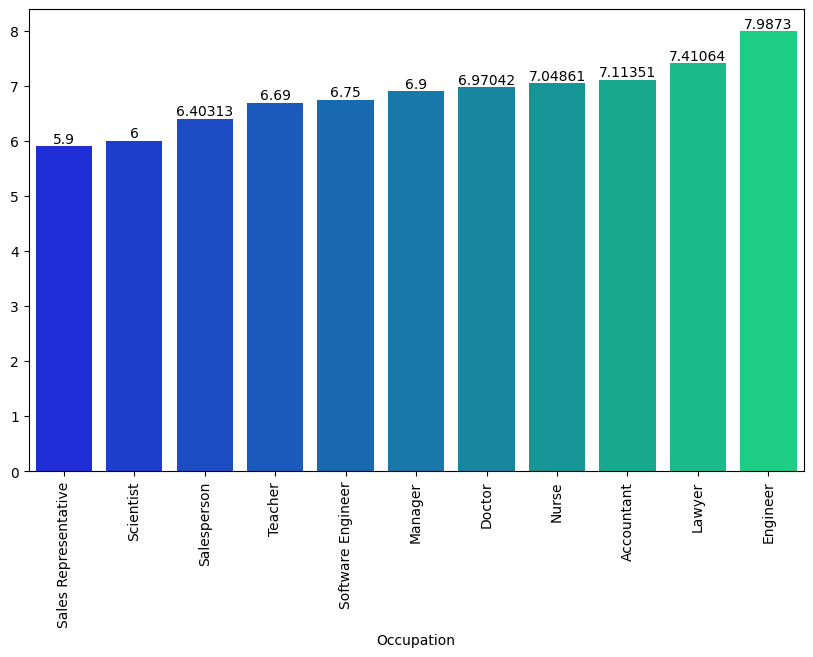

In [10]:
occupation_sleep=df.groupby('Occupation')['Sleep Duration'].mean().sort_values()
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df,x=occupation_sleep.index,y=occupation_sleep.values,palette='winter')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [11]:
# Perform one-hot encoding on non numerical variables
non_numerical_vars = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=non_numerical_vars)
df_encoded.head()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Gender_Female,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,104,77,4200,False,...,False,False,True,False,False,False,False,True,False,False
1,2,28,6.2,6,60,8,102,75,10000,False,...,False,False,False,False,True,False,False,False,False,False
2,3,28,6.2,6,60,8,102,75,10000,False,...,False,False,False,False,True,False,False,False,False,False
3,4,28,5.9,4,30,8,115,85,3000,False,...,False,False,False,False,False,False,True,False,False,True
4,5,28,5.9,4,30,8,115,85,3000,False,...,False,False,False,False,False,False,True,False,False,True


In [12]:
X = df_encoded.drop(columns=['Quality of Sleep'])  # Features
y = df_encoded['Quality of Sleep']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# XGBoost Regressor model
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metric 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 0.020120810105890997
Mean Absolute Error: 0.027189178466796873
R-squared Score: 0.985880793806682


<Figure size 10000x10000 with 0 Axes>

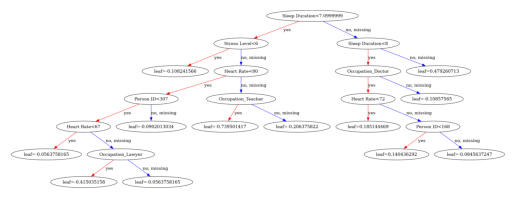

In [14]:
plt.figure(figsize=(100, 100))
plot_tree(model, num_trees=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

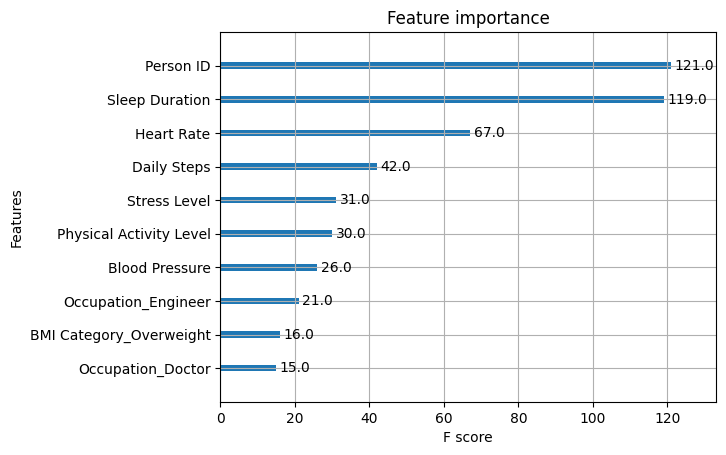

In [15]:
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10) 
plt.show()

The dataset is small but the predictive quality of the model is outstanding. The variables are pretty correlated as seen before in the corr matrix but also by intution, i was not expecting a similar result. 
